<a href="https://colab.research.google.com/github/Livineshram/Toyota-Camry-Sales-Forecast/blob/main/AutoCarModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP 1: LOAD THE DATASET

In [31]:
import pandas as pd

#load the dataset
df = pd.read_csv('/content/sample_data/automobile_prices_economics_2019_2023.csv')
df.head()

,Month/Year,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
0,19-Jan,"25,000","18,000",1.60%,2.40%,"28,500"
1,19-Feb,"25,000","17,900",1.50%,2.40%,"29,000"
2,19-Mar,"25,000","17,800",1.90%,2.40%,"31,500"
3,19-Apr,"25,000","17,700",2.00%,2.40%,"30,000"
4,19-May,"25,000","17,600",1.80%,2.40%,"32,000"


STEP 2: Inspecting Dataset

In [32]:
# Display data types and number of non-null values for each column
df.info()

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check for basic statistics to get a sense of outliers and distributions
print("\nBasic statistics for numerical columns:")
print(df.describe())

# Inspect unique values in some columns to detect any inconsistencies or unexpected data formats
print("\nUnique values in each column:")
print(df.nunique())

# Optionally, inspect the first few rows of the dataset for manual checks
df.head()

# Check for duplicated rows
print("\nNumber of duplicated rows:", df.duplicated().sum())

# Display column names
print("\nColumn names:", df.columns.tolist())

constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print("\nConstant columns:", constant_cols)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Month/Year          60 non-null     object
 1   New Price ($)       60 non-null     object
 2   Used Price ($)      60 non-null     object
 3   Inflation Rate (%)  60 non-null     object
 4   Interest Rate (%)   60 non-null     object
 5   Units Sold          60 non-null     object
dtypes: object(6)
memory usage: 3.0+ KB
Missing values in each column:
Month/Year            1
New Price ($)         1
Used Price ($)        1
Inflation Rate (%)    1
Interest Rate (%)     1
Units Sold            1
dtype: int64

Basic statistics for numerical columns:
       Month/Year New Price ($) Used Price ($) Inflation Rate (%)  \
count          60            60             60                 60   
unique         60            17             43                 46   
top        19-Jan        25,000       

 STEP 3: DATA CLEANING

In [33]:

# Drop the row with all missing values (likely the last row)
df = df.dropna(how='all')

# Convert 'Month/Year' to datetime format
df.loc[:, 'Month/Year'] = pd.to_datetime(df['Month/Year'], format='%y-%b', errors='coerce')

# Clean monetary columns: remove commas and convert to float
price_cols = ['New Price ($)', 'Used Price ($)']
for col in price_cols:
    df.loc[:, col] = df[col].str.replace(',', '', regex=False).astype(float)

# Clean percentage columns: remove '%' and convert to float
percent_cols = ['Inflation Rate (%)', 'Interest Rate (%)']
for col in percent_cols:
    df.loc[:, col] = df[col].str.replace('%', '', regex=False).astype(float)

# Clean 'Units Sold': remove commas and convert to integer
df.loc[:, 'Units Sold'] = df['Units Sold'].str.replace(',', '', regex=False).astype(int)

# Forward fill any remaining missing values
df = df.ffill()

# Final checks
print("Cleaned DataFrame Info:")
print(df.info())

print("\n Any Remaining Missing Values:")
print(df.isnull().sum())

# Preview the cleaned dataset
df.head()


Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Month/Year          60 non-null     datetime64[ns]
 1   New Price ($)       60 non-null     float64       
 2   Used Price ($)      60 non-null     float64       
 3   Inflation Rate (%)  60 non-null     float64       
 4   Interest Rate (%)   60 non-null     float64       
 5   Units Sold          60 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 3.3 KB
None

 Any Remaining Missing Values:
Month/Year            0
New Price ($)         0
Used Price ($)        0
Inflation Rate (%)    0
Interest Rate (%)     0
Units Sold            0
dtype: int64


<ipython-input-33-1ca0e63956b5>:21: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Month/Year,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
0,2019-01-01,25000.0,18000.0,1.6,2.4,28500
1,2019-02-01,25000.0,17900.0,1.5,2.4,29000
2,2019-03-01,25000.0,17800.0,1.9,2.4,31500
3,2019-04-01,25000.0,17700.0,2.0,2.4,30000
4,2019-05-01,25000.0,17600.0,1.8,2.4,32000


STEP 5: EXPLORATORY DATA ANALYSIS

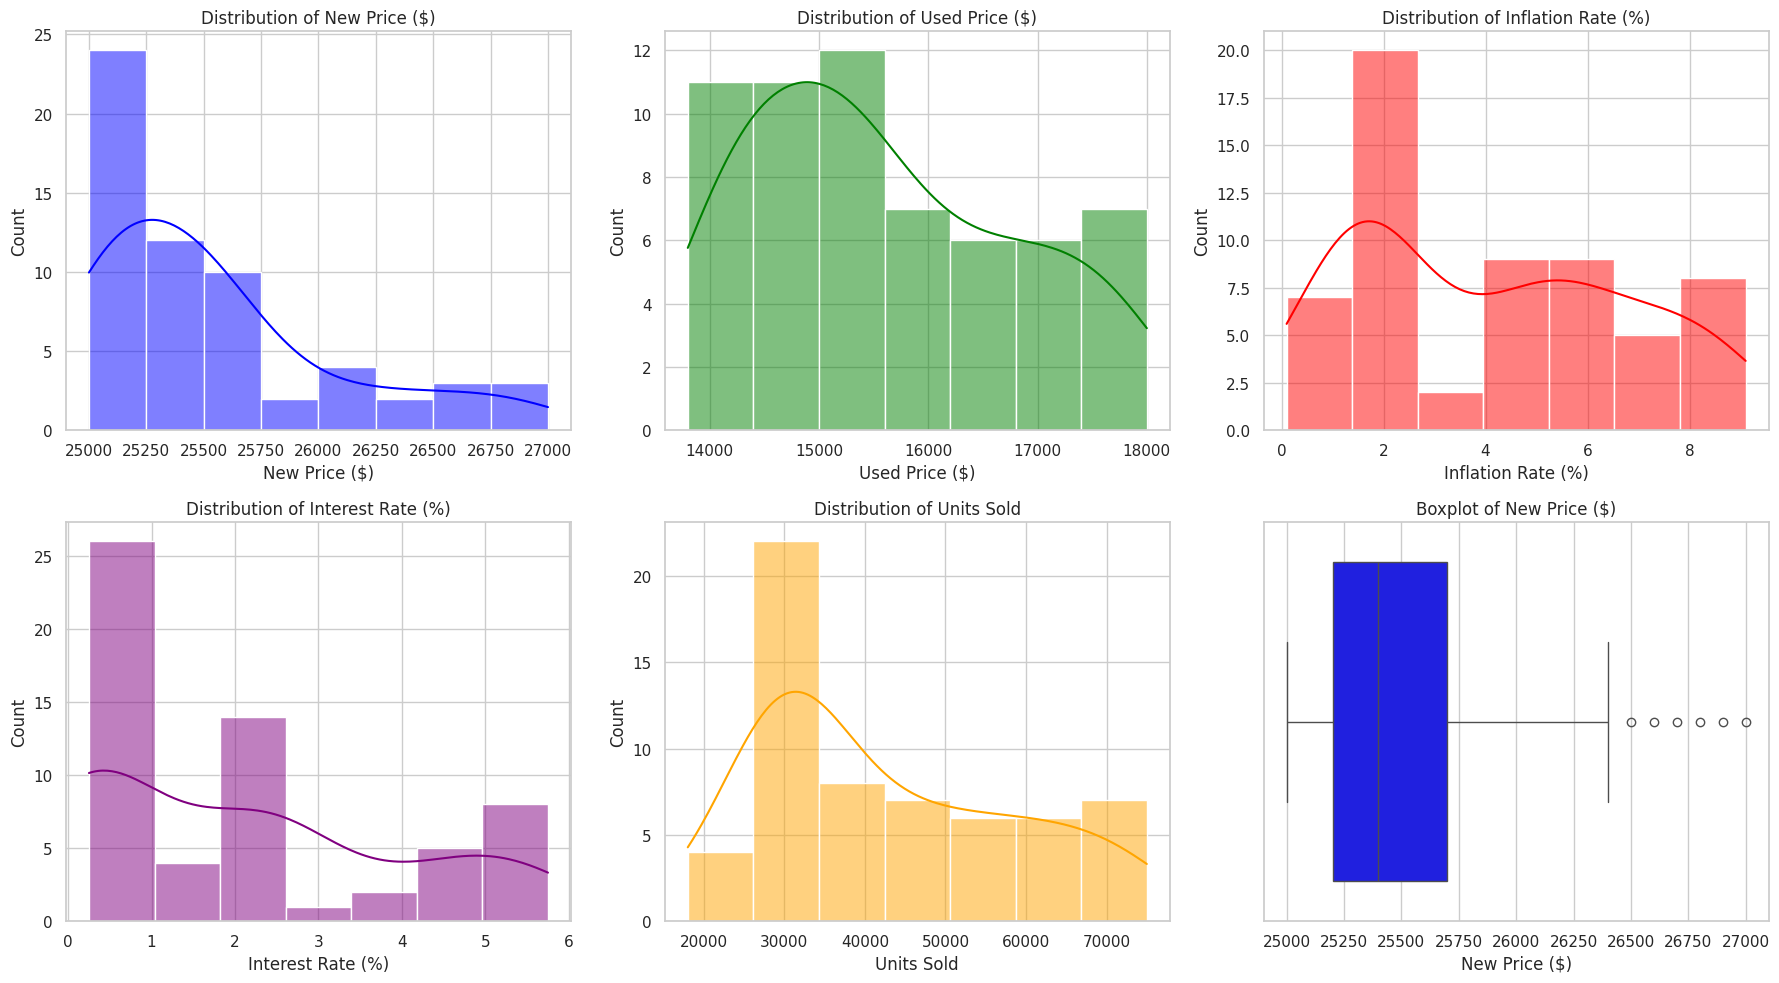

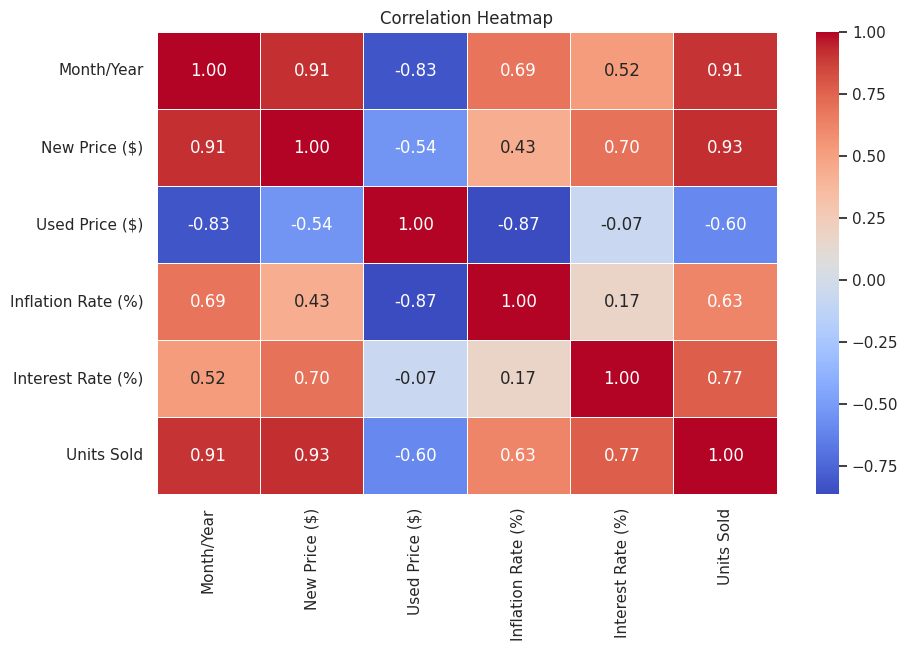

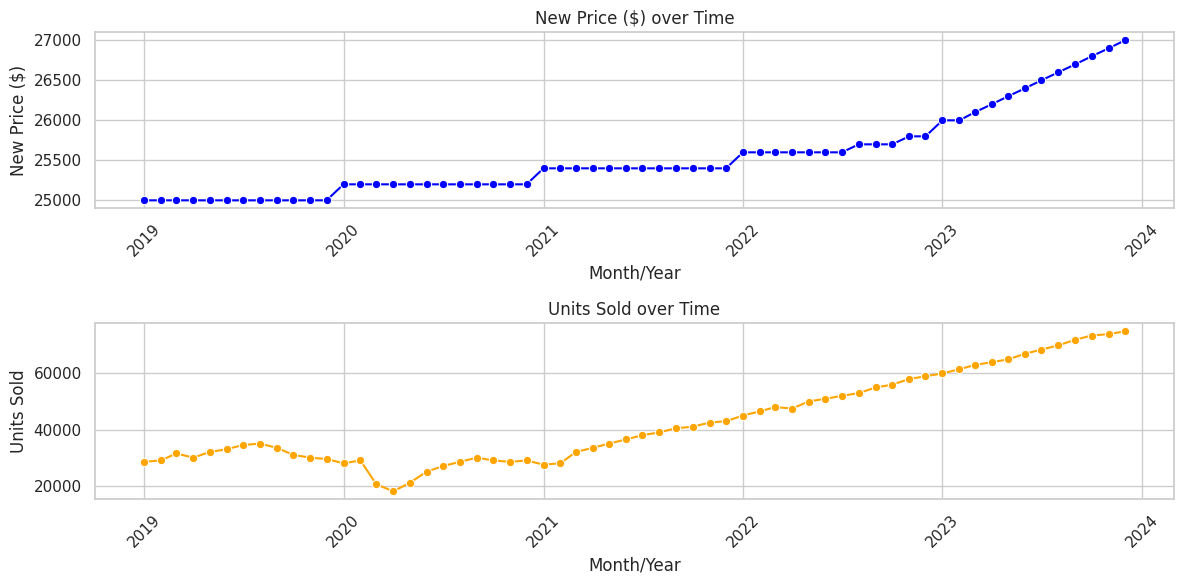

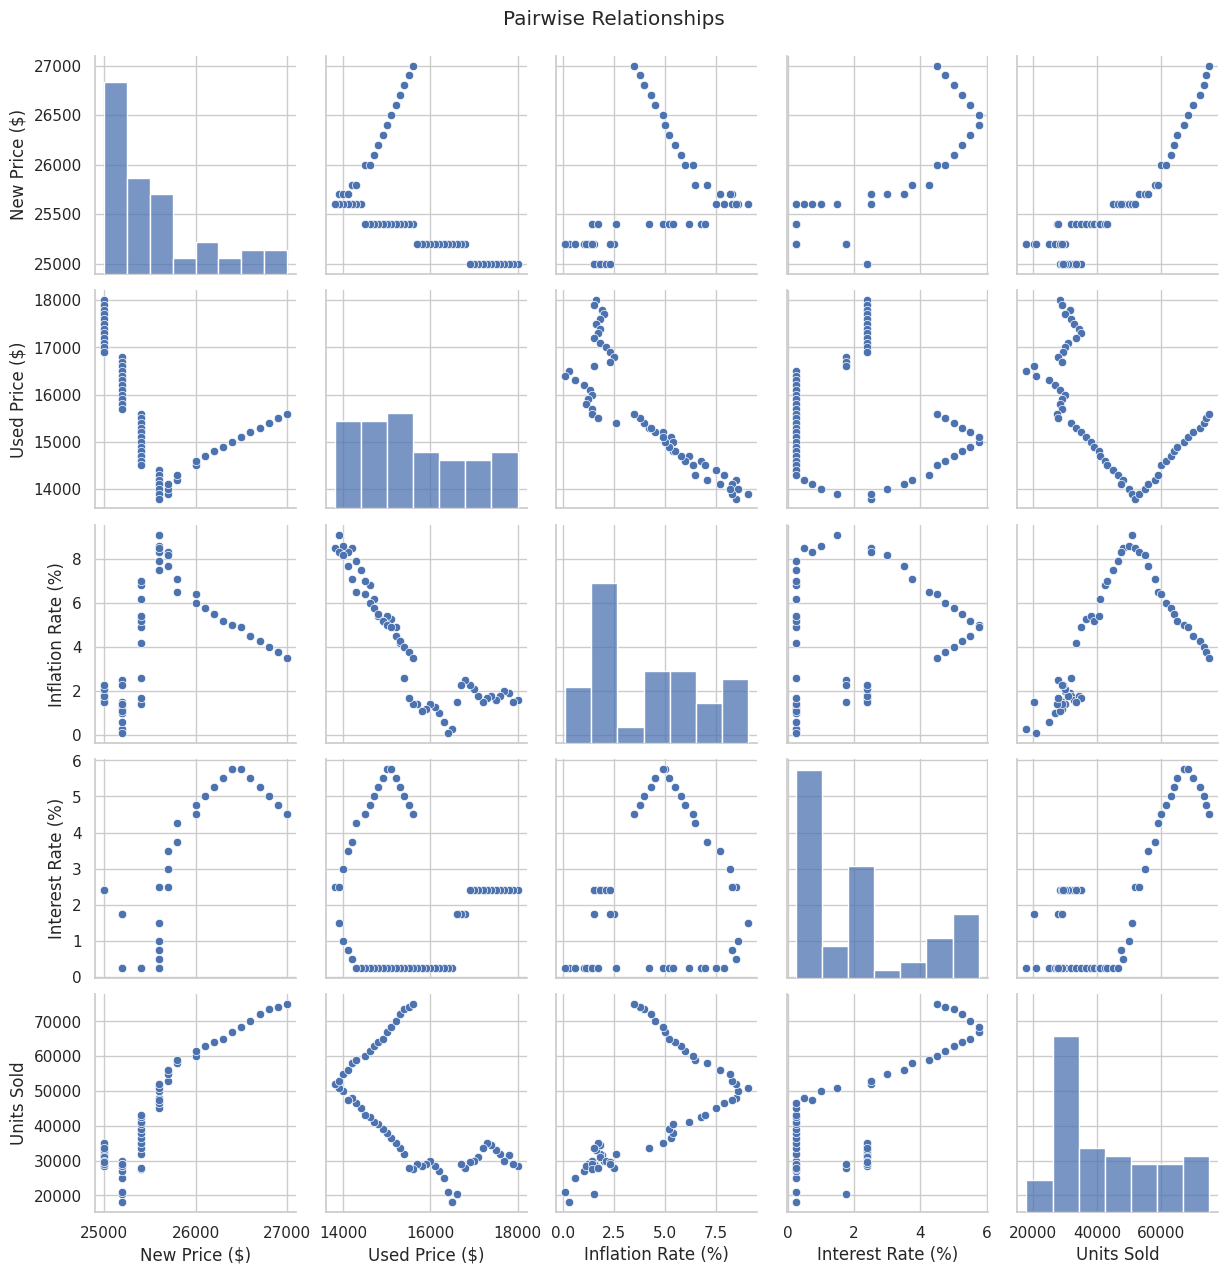

                Month/Year  New Price ($)  Used Price ($)  Inflation Rate (%)  \
count                   60      60.000000       60.000000           60.000000   
mean   2021-06-16 06:24:00   25543.333333    15580.000000            4.125000   
min    2019-01-01 00:00:00   25000.000000    13800.000000            0.100000   
25%    2020-03-24 06:00:00   25200.000000    14600.000000            1.675000   
50%    2021-06-16 00:00:00   25400.000000    15350.000000            4.100000   
75%    2022-09-08 12:00:00   25700.000000    16525.000000            6.250000   
max    2023-12-01 00:00:00   27000.000000    18000.000000            9.100000   
std                    NaN     533.732195     1210.658877            2.660867   

       Interest Rate (%)    Units Sold  
count          60.000000     60.000000  
mean            2.075833  42700.000000  
min             0.250000  18000.000000  
25%             0.250000  29375.000000  
50%             2.075000  37250.000000  
75%             3.125000

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Set up the plot style
sns.set(style="whitegrid")

# Step 2: Visualize the distribution of numerical columns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot distribution of 'New Price ($)'
sns.histplot(df['New Price ($)'], kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of New Price ($)')

# Plot distribution of 'Used Price ($)'
sns.histplot(df['Used Price ($)'], kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Used Price ($)')

# Plot distribution of 'Inflation Rate (%)'
sns.histplot(df['Inflation Rate (%)'], kde=True, color='red', ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Inflation Rate (%)')

# Plot distribution of 'Interest Rate (%)'
sns.histplot(df['Interest Rate (%)'], kde=True, color='purple', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Interest Rate (%)')

# Plot distribution of 'Units Sold'
sns.histplot(df['Units Sold'], kde=True, color='orange', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Units Sold')

# Boxplot to detect outliers in 'New Price ($)'
sns.boxplot(x=df['New Price ($)'], color='blue', ax=axes[1, 2])
axes[1, 2].set_title('Boxplot of New Price ($)')

# Adjust layout
plt.tight_layout()
plt.show()

# Step 3: Check correlation heatmap to explore relationships
corr_matrix = df.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Step 4: Check trends over time - Line plots for prices and units sold
plt.figure(figsize=(12, 6))

# Plot 'New Price ($)' over time
plt.subplot(2, 1, 1)
sns.lineplot(x=df['Month/Year'], y=df['New Price ($)'], marker='o', color='blue')
plt.title('New Price ($) over Time')
plt.xticks(rotation=45)

# Plot 'Units Sold' over time
plt.subplot(2, 1, 2)
sns.lineplot(x=df['Month/Year'], y=df['Units Sold'], marker='o', color='orange')
plt.title('Units Sold over Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Step 5: Check for any pairwise relationships (scatter plots)
sns.pairplot(df[['New Price ($)', 'Used Price ($)', 'Inflation Rate (%)', 'Interest Rate (%)', 'Units Sold']])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()
print(df.describe())




Time Series Forecasting (Prophet)

In [35]:
from prophet import Prophet
from prophet.plot import plot_plotly
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create a new DataFrame with required columns
df_prophet = df[['Month/Year', 'Units Sold', 'New Price ($)', 'Used Price ($)', 'Inflation Rate (%)', 'Interest Rate (%)']].copy()
df_prophet.rename(columns={'Month/Year': 'ds', 'Units Sold': 'y'}, inplace=True)


TIME SERIES: DATA MODELLING


In [36]:
model = Prophet()

# Add external regressors
regressors = ['New Price ($)', 'Used Price ($)', 'Inflation Rate (%)', 'Interest Rate (%)']
for reg in regressors:
    model.add_regressor(reg)

model.fit(df_prophet)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1y5a2kb5/oy8d2l7r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1y5a2kb5/2n_mmkr3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90418', 'data', 'file=/tmp/tmp1y5a2kb5/oy8d2l7r.json', 'init=/tmp/tmp1y5a2kb5/2n_mmkr3.json', 'output', 'file=/tmp/tmp1y5a2kb5/prophet_modelsfnib1g4/prophet_model-20250425083117.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:31:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:31:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


TIME SERIES MODEL: PREDICTION

In [37]:
future = model.make_future_dataframe(periods=12, freq='M')  # Extend for 12 months
future = future.merge(df_prophet, on='ds', how='left')  # Bring in regressor values for known months

# Optional: forward-fill if necessary
future[regressors] = future[regressors].ffill()


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



 Finalizing the Prophet Model

In [38]:
forecast = model.predict(future)

# Plot forecast
plot_plotly(model, forecast)


TIME SERIES MODEL: EVALUATIING DATA

In [39]:
# Evaluate only on known data (first 60 months)
y_true = df_prophet['y']
y_pred = forecast.loc[:59, 'yhat']

print("MAE:", mean_absolute_error(y_true, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
print("R² Score:", r2_score(y_true, y_pred))



MAE: 1173.124587757105
RMSE: 1442.745242991272
R² Score: 0.9916147447532623


GRAPH FOR PREDICTION

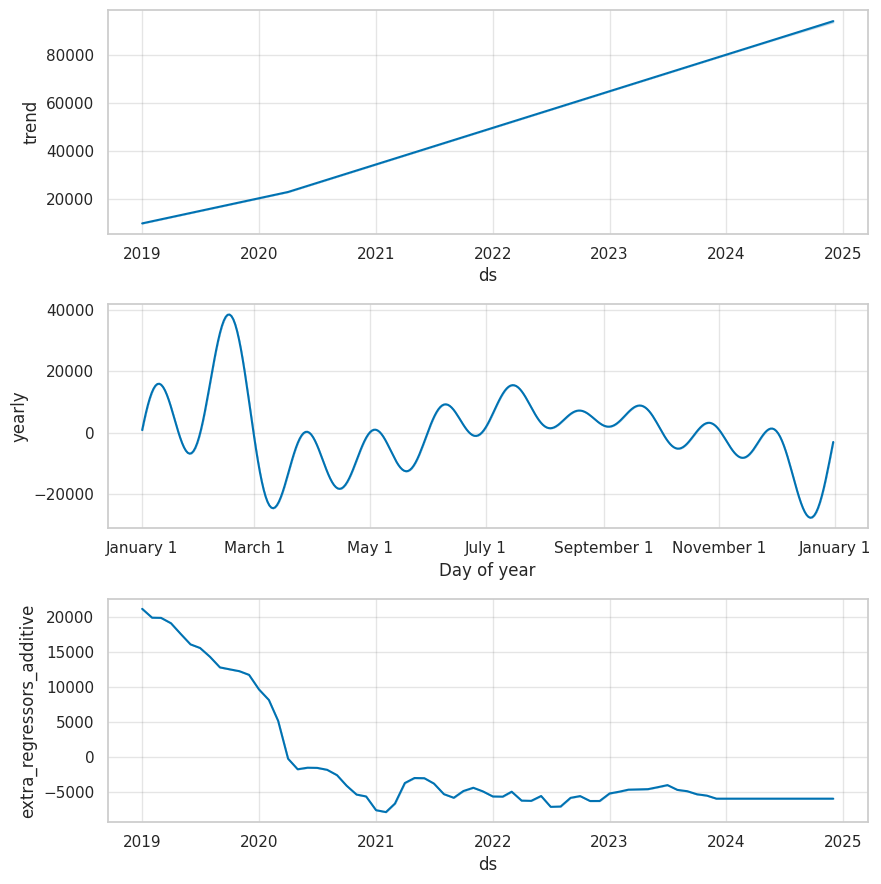

In [40]:
model.plot_components(forecast)
plt.show()


In [41]:
# See the forecasted values for 2024
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)


,ds,yhat,yhat_lower,yhat_upper
60,2023-12-31,69703.265109,68005.554301,71553.536603
61,2024-01-31,72726.561251,70949.293163,74656.942525
62,2024-02-29,78532.720562,76685.808477,80376.763696
63,2024-03-31,77365.417637,75433.834805,79187.125323
64,2024-04-30,78990.963585,77086.547092,80755.636210
65,2024-05-31,80543.703598,78630.904495,82306.909527
66,2024-06-30,83022.531879,81167.092841,84799.788057
67,2024-07-31,85734.607700,83828.197032,87606.640058
68,2024-08-31,87165.118935,85179.886962,88970.250754
69,2024-09-30,87776.921185,86055.340094,89685.257061


Toyota Camry Sales Forecast (2024)

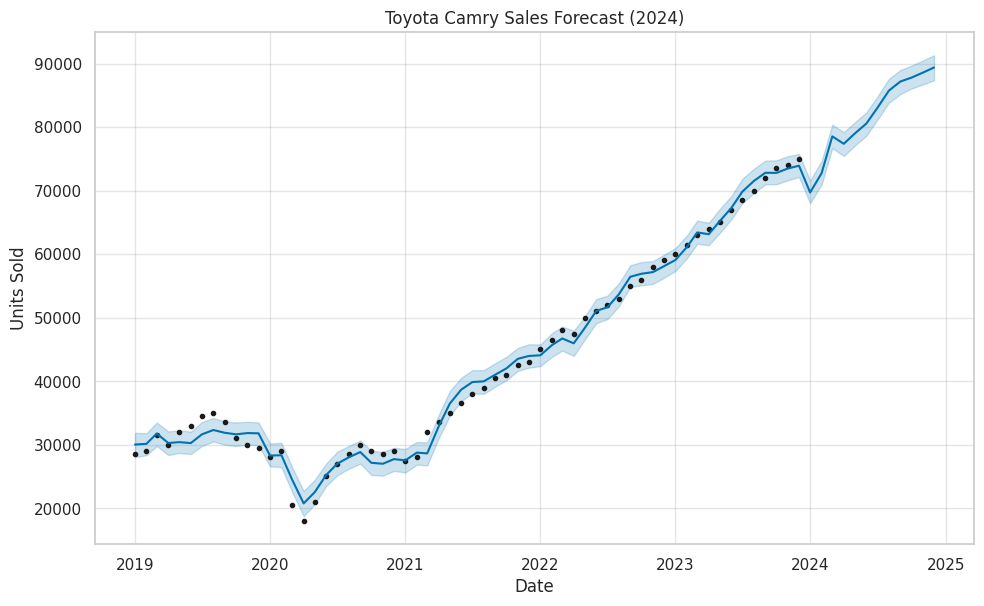

In [42]:
fig = model.plot(forecast)
plt.title("Toyota Camry Sales Forecast (2024)")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.grid(True)
plt.show()


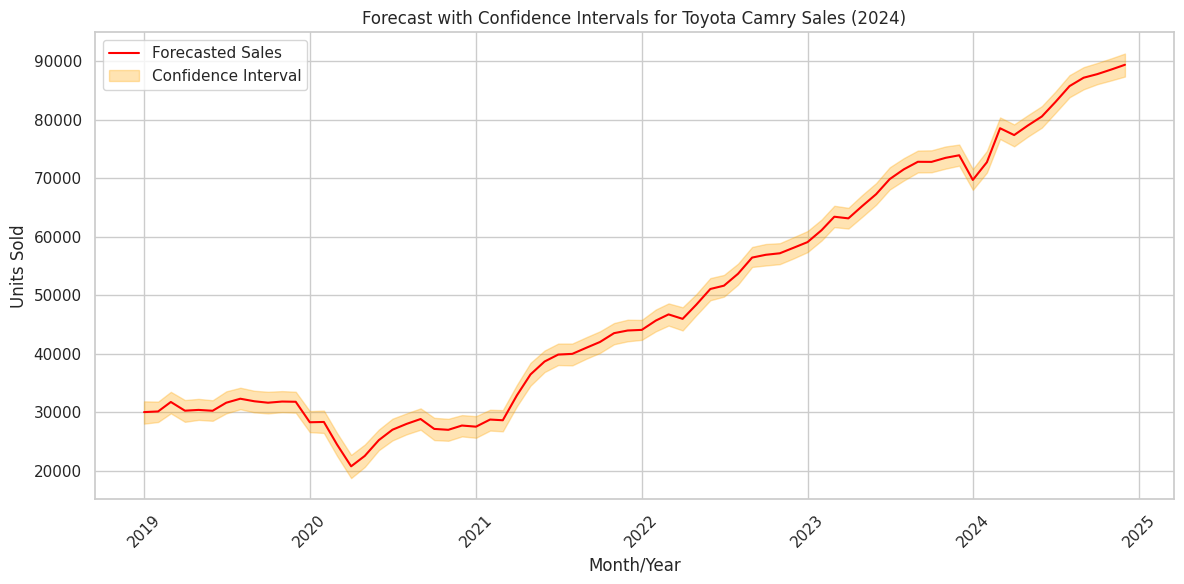

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Sales', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.3, label='Confidence Interval')
plt.title('Forecast with Confidence Intervals for Toyota Camry Sales (2024)')
plt.xlabel('Month/Year')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
